In [42]:
# Importing all the required lib
import pandas as pd
import numpy as np
import os
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from matplotlib import pyplot as plt
import seaborn as sns

# Loading All The Data Files

In [2]:
# Loading the Data
ra_02_df = pd.read_excel("../Data/02 RA data (updated Apr'21) raw data only.xlsx")
ka_04_df = pd.read_excel("../Data/04 KA data.xlsx")
sku_mapping = pd.read_csv('../Data/07 mapping table (active SKU).csv')

# Basic Data Health Checkup

In [3]:
print("Total Records In Ra_02 file- ", ra_02_df.shape)
print("RA_02 File Overview")
display(ra_02_df.head())

Total Records In Ra_02 file-  (39650, 15)
RA_02 File Overview


,State,Region,Channel_Mod,Channel Breakdown,SKU,Price Segment,Brand House,Manufacturer,Tar x Flavour,Tar x Flavour with Kretek,Price x Tar,Month,Volume,Value,Unnamed: 14
0,Ipoh,NORTH,KAD,KAD,BENSON & HEDGES,PREMIUM,Benson & Hedges,BAT,Full Flavour,Full Flavour,Premium x Full Flavour,2020-01-01,124.677,108.46899,NaN
1,Ipoh,NORTH,KAD,KAD,CHESTERFIELD BLUE,VFM,Chesterfield,PMI,Lights,Lights,Vfm x Lights,2020-01-01,172.320,106.83840,NaN
2,Ipoh,NORTH,KAD,KAD,CHESTERFIELD CHARCOAL,VFM,Chesterfield,PMI,Lights,Lights,Vfm x Lights,2020-01-01,102.977,63.84574,NaN
3,Ipoh,NORTH,KAD,KAD,CHESTERFIELD GREEN,VFM,Chesterfield,PMI,Menthol,Menthol,Vfm x Menthol,2020-01-01,139.161,86.27982,NaN
4,Ipoh,NORTH,KAD,KAD,CHESTERFIELD PURPLE CAPSULE,VFM,Chesterfield,PMI,Menthol,Menthol,Vfm x Menthol,2020-01-01,73.635,45.65370,NaN


In [4]:
print("Total Records In KA_04 file- ", ka_04_df.shape)
print("KA_04 File Overview")
display(ka_04_df.head())

Total Records In KA_04 file-  (115395, 9)
KA_04 File Overview


,DWH_STATE,ACC,Company,ProductFamily,SKU_CODE,PriceSegment,Flavour,YYYYMM,Total (sticks)
0,NaN,KKMART,BAT,B&H,B&H FF,HP,FF,201801,600
1,NaN,KKMART,BAT,B&H,B&H FF,HP,FF,201802,760
2,NaN,KKMART,BAT,B&H,B&H FF,HP,FF,201803,700
3,NaN,KKMART,BAT,B&H,B&H FF,HP,FF,201804,820
4,NaN,KKMART,BAT,B&H,B&H FF,HP,FF,201805,720


In [5]:
print("Total Records In SKU mapping  file- ", sku_mapping.shape)
print("SKU mapping File Overview")
display(sku_mapping.head())

Total Records In SKU mapping  file-  (96, 5)
SKU mapping File Overview


,Manufacturer,Brand House,RA raw data (file 01 & 02),KA data (file 04),Remarks
0,BAT,Benson & Hedges,BENSON & HEDGES,B&H FF,NaN
1,BAT,Dunhill,DH CLASSIC FF(WITH UNITY LEP),DH FF DKS Empire,NaN
2,BAT,Dunhill,DH SPECTRUM FF (WITH BEYOND),DH FF DKS,NaN
3,BAT,Dunhill,DH SPECTRUM FF (WITH BEYOND),DH FF DKS,Combine with DH FF DKS
4,BAT,Dunhill,DH KS LIGHTS (WITH BEYOND),DH LTS DKS,NaN


### Missing Values CHeck UP

In [6]:
ra_02_df.isnull().sum()

State                            0
Region                           0
Channel_Mod                      0
Channel Breakdown                0
SKU                              0
Price Segment                  342
Brand House                    342
Manufacturer                   342
Tar x Flavour                  342
Tar x Flavour with Kretek      342
Price x Tar                    342
Month                            0
Volume                           0
Value                            0
Unnamed: 14                  39650
dtype: int64

In [7]:
ka_04_df.isnull().sum()

DWH_STATE         865
ACC                 0
Company             0
ProductFamily       0
SKU_CODE            0
PriceSegment        0
Flavour             0
YYYYMM              0
Total (sticks)      0
dtype: int64

In [8]:
sku_mapping.isnull().sum()

Manufacturer                   0
Brand House                    0
RA raw data (file 01 & 02)     3
KA data (file 04)              0
Remarks                       87
dtype: int64

In [9]:
# SKUs where Brand House is null

In [10]:
# Unique SKUs count
ra_02_df.loc[ra_02_df['Brand House'].isnull(), 'SKU'].unique()

# Either these SKUs are incomplete or invalid as there is no mapping available in SKU mapping file

array(['BENSON', 'CHESTERFIELD', 'DUNHILL', 'KENT', 'L&M', 'LD',
       'MARLBORO', 'MEVIUS', 'PALL MALL', 'PETER STUYVESANT', 'ROTHMANS',
       'SAMPOERNA', 'WINSTON'], dtype=object)

In [6]:
ra_02_df.groupby(['State',
                 'Channel_Mod',
                  'Channel Breakdown',
                 'SKU'])['Volume'].size().reset_index()

,State,Channel_Mod,Channel Breakdown,SKU,Volume
0,Ipoh,KAD,KAD,BENSON & HEDGES,16
1,Ipoh,KAD,KAD,BOND STREET BLUE,7
2,Ipoh,KAD,KAD,BOND STREET GREEN,7
3,Ipoh,KAD,KAD,BOND STREET RED,7
4,Ipoh,KAD,KAD,CHESTERFIELD BLUE,16
...,...,...,...,...,...
3399,Selangor,MASS MARKET,Sundry_MM,WINSTON PLAIN,15
3400,Selangor,MASS MARKET,Sundry_MM,WINSTON RED,15
3401,Selangor,MASS MARKET,Sundry_MM,WINSTON XS BLUE,2
3402,Selangor,MASS MARKET,Sundry_MM,WINSTON XS DUO FREEZE,15


In [7]:
# Preparing the raw 2 data
ra2_agg_df = ra_02_df.groupby(['State',
                              'Channel_Mod',
                              'SKU',
                               'Brand House',
                               'Manufacturer',
                               'Month'
                              ]).agg({'Volume':'sum',
                                      'Value':'sum'
                                     }).reset_index()

ra2_agg_df.head()

,State,Channel_Mod,SKU,Brand House,Manufacturer,Month,Volume,Value
0,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-01-01,124.677,108.46899
1,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-02-01,108.907,94.74909
2,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-03-01,132.208,115.02096
3,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-04-01,173.932,151.32084
4,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-05-01,115.438,100.43106


In [ ]:
ra2_agg_df.to_csv('ra2_agg_data.csv', index=False)

In [8]:
sku_mapping = sku_mapping.drop_duplicates(['Brand House', 'RA raw data (file 01 & 02)', 'KA data (file 04)', 'Manufacturer'])

In [9]:
print(ra2_agg_df.shape)

ka02_mapped_final_df = pd.merge(ra2_agg_df, sku_mapping, 
                  left_on= ['SKU', 'Manufacturer', 'Brand House'],
                  right_on=['RA raw data (file 01 & 02)', 'Manufacturer', 'Brand House'],
                  how='left'
                 )
print(ka02_mapped_final_df.shape)

(21265, 8)
(21265, 11)


# Analysis of File 04

In [10]:
ka_04_df.isnull().sum()

DWH_STATE         865
ACC                 0
Company             0
ProductFamily       0
SKU_CODE            0
PriceSegment        0
Flavour             0
YYYYMM              0
Total (sticks)      0
dtype: int64

In [11]:
ka_04_df['DWH_STATE'].unique()

array([nan, 'DUTY FREE', 'IPOH', 'JOHOR BARU', 'KOTA BARU',
       'KOTA KINABALU', 'KUALA LUMPUR', 'KUANTAN', 'KUCHING', 'MELAKA',
       'PENANG', 'SELANGOR', '(blank)'], dtype=object)

In [13]:
ka_04_df['DWH_STATE'].value_counts()

SELANGOR         14837
MELAKA           14554
KUALA LUMPUR     14498
JOHOR BARU       12724
IPOH             10620
PENANG           10485
KUCHING           9293
KOTA BARU         9012
KUANTAN           7794
KOTA KINABALU     5570
(blank)           3712
DUTY FREE         1431
Name: DWH_STATE, dtype: int64

In [14]:
# replacing (blank) to nan
ka_04_df['DWH_STATE_Cleaned'] = np.where(ka_04_df['DWH_STATE'] == "(blank)",
                                         np.nan,
                                         ka_04_df['DWH_STATE']
                                        )

In [15]:
ka_04_df['DWH_STATE_Cleaned'].value_counts()

SELANGOR         14837
MELAKA           14554
KUALA LUMPUR     14498
JOHOR BARU       12724
IPOH             10620
PENANG           10485
KUCHING           9293
KOTA BARU         9012
KUANTAN           7794
KOTA KINABALU     5570
DUTY FREE         1431
Name: DWH_STATE_Cleaned, dtype: int64

In [16]:
# Counting blank values again
ka_04_df.isnull().sum()

DWH_STATE             865
ACC                     0
Company                 0
ProductFamily           0
SKU_CODE                0
PriceSegment            0
Flavour                 0
YYYYMM                  0
Total (sticks)          0
DWH_STATE_Cleaned    4577
dtype: int64

In [17]:
# Taking 2020 data only for training purpose
ka_04_2020_df = ka_04_df[(ka_04_df['YYYYMM']>=202001) & (ka_04_df['YYYYMM']<=202012)].reset_index(drop=True)
print("After taking only 2020 data")
print("Shape of the filtered data - ", ka_04_2020_df.shape)
ka_04_2020_df.head()

After taking only 2020 data
Shape of the filtered data -  (39749, 10)


,DWH_STATE,ACC,Company,ProductFamily,SKU_CODE,PriceSegment,Flavour,YYYYMM,Total (sticks),DWH_STATE_Cleaned
0,DUTY FREE,711,BAT,B&H,B&H FF,HP,FF,202001,3900,DUTY FREE
1,DUTY FREE,711,BAT,B&H,B&H FF,HP,FF,202002,2260,DUTY FREE
2,DUTY FREE,711,BAT,B&H,B&H FF,HP,FF,202003,1980,DUTY FREE
3,DUTY FREE,711,BAT,B&H,B&H FF,HP,FF,202004,780,DUTY FREE
4,DUTY FREE,711,BAT,B&H,B&H FF,HP,FF,202005,680,DUTY FREE


In [18]:
# Any missing value now
ka_04_2020_df.isnull().sum()

DWH_STATE               0
ACC                     0
Company                 0
ProductFamily           0
SKU_CODE                0
PriceSegment            0
Flavour                 0
YYYYMM                  0
Total (sticks)          0
DWH_STATE_Cleaned    1520
dtype: int64

In [24]:
# Threr should be total 12 value at agg level
ka_04_2020_df.groupby(['DWH_STATE_Cleaned',
                       'ACC',
                       'Company',
                       'SKU_CODE'
                       ])['YYYYMM'].size().reset_index().to_csv('ka_04_count_data.csv', index=False)

ka_04_2020_df.groupby(['DWH_STATE_Cleaned',
                       'ACC',
                       'Company',
                       'SKU_CODE'
                       ])['YYYYMM'].size()

DWH_STATE_Cleaned  ACC    Company  SKU_CODE               
DUTY FREE          711    BAT      B&H FF                     12
                                   DH FF DKS                  12
                                   DH FF DKS Empire           12
                                   DH LTS DKS                 12
                                   DH MTH DKS                 12
                                                              ..
SELANGOR           SHELL  PMI      MARL MTH Black Mth         12
                                   MARL MTH Double Burst      12
                                   MARL MTH Mega Ice Blast    12
                                   SAMPOERNA FF A Mild        12
                                   SAMPOERNA MTH A Mild       12
Name: YYYYMM, Length: 3802, dtype: int64

In [ ]:
# For checking how many skus and states have
ka_04_2020_df.groupby(['DWH_STATE_Cleaned',
                       'ACC',
                       'Company',
                       'SKU_CODE',
                       'YYYYMM'
                       ])['Total (sticks)'].size().reset_index().to_csv("checking_04_good_data_count.csv", index=False)

In [19]:
# creating the total_sticks_new
ka_04_2020_df['Total_Sticks'] = ka_04_2020_df['Total (sticks)']/1000
ka_04_2020_df.head()

,DWH_STATE,ACC,Company,ProductFamily,SKU_CODE,PriceSegment,Flavour,YYYYMM,Total (sticks),DWH_STATE_Cleaned,Total_Sticks
0,DUTY FREE,711,BAT,B&H,B&H FF,HP,FF,202001,3900,DUTY FREE,3.90
1,DUTY FREE,711,BAT,B&H,B&H FF,HP,FF,202002,2260,DUTY FREE,2.26
2,DUTY FREE,711,BAT,B&H,B&H FF,HP,FF,202003,1980,DUTY FREE,1.98
3,DUTY FREE,711,BAT,B&H,B&H FF,HP,FF,202004,780,DUTY FREE,0.78
4,DUTY FREE,711,BAT,B&H,B&H FF,HP,FF,202005,680,DUTY FREE,0.68


In [20]:
# Aggregating the data; # Preparing the data
cols_to_agg = ['DWH_STATE_Cleaned',
               'ACC',
               'SKU_CODE',
               'YYYYMM'
              ]
    
def prepare_ka04_df(df, col):
   

    ka_04_2020_agg_df = df.groupby(cols_to_agg)['Total_Sticks'].sum().reset_index()
    
    return ka_04_2020_agg_df


ka_04_2020_agg_df = prepare_ka04_df(ka_04_2020_df, cols_to_agg)

In [21]:
ka_04_2020_agg_df.head()

,DWH_STATE_Cleaned,ACC,SKU_CODE,YYYYMM,Total_Sticks
0,DUTY FREE,711,B&H FF,202001,3.90
1,DUTY FREE,711,B&H FF,202002,2.26
2,DUTY FREE,711,B&H FF,202003,1.98
3,DUTY FREE,711,B&H FF,202004,0.78
4,DUTY FREE,711,B&H FF,202005,0.68


In [38]:
ka02_mapped_final_df.head()

,State,Channel_Mod,SKU,Brand House,Manufacturer,Month,Volume,Value,RA raw data (file 01 & 02),KA data (file 04),Remarks,month,year,time
0,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-01-01,124.677,108.46899,BENSON & HEDGES,B&H FF,NaN,01,2020,202001
1,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-02-01,108.907,94.74909,BENSON & HEDGES,B&H FF,NaN,02,2020,202002
2,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-03-01,132.208,115.02096,BENSON & HEDGES,B&H FF,NaN,03,2020,202003
3,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-04-01,173.932,151.32084,BENSON & HEDGES,B&H FF,NaN,04,2020,202004
4,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-05-01,115.438,100.43106,BENSON & HEDGES,B&H FF,NaN,05,2020,202005


In [30]:
# Converting the Date column into YYYYMM format
ka02_mapped_final_df['month'] = ka02_mapped_final_df['Month'].dt.month
ka02_mapped_final_df['year'] = ka02_mapped_final_df['Month'].dt.year
ka02_mapped_final_df['month'] = ka02_mapped_final_df['month'
                                                    ].astype(str
                                                            ). apply(lambda x: "0"+x if len(x) == 1 else x)


ka02_mapped_final_df['time'] = ka02_mapped_final_df['year'].astype(str) + ka02_mapped_final_df['month']
ka02_mapped_final_df['time'] = ka02_mapped_final_df['time'].astype(int)

ka02_mapped_final_df.head()

,State,Channel_Mod,SKU,Brand House,Manufacturer,Month,Volume,Value,RA raw data (file 01 & 02),KA data (file 04),Remarks,month,year,time
0,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-01-01,124.677,108.46899,BENSON & HEDGES,B&H FF,NaN,01,2020,202001
1,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-02-01,108.907,94.74909,BENSON & HEDGES,B&H FF,NaN,02,2020,202002
2,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-03-01,132.208,115.02096,BENSON & HEDGES,B&H FF,NaN,03,2020,202003
3,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-04-01,173.932,151.32084,BENSON & HEDGES,B&H FF,NaN,04,2020,202004
4,Ipoh,KAD,BENSON & HEDGES,Benson & Hedges,BAT,2020-05-01,115.438,100.43106,BENSON & HEDGES,B&H FF,NaN,05,2020,202005


In [50]:
ka02_mapped_final_df['time'] = ka02_mapped_final_df['time'].astype(int)
ka02_mapped_final_df['State'] = ka02_mapped_final_df['State'].str.strip()
ka02_mapped_final_df['State'] = ka02_mapped_final_df['State'].str.lower()
ka02_mapped_final_df['KA data (file 04)'] = ka02_mapped_final_df['KA data (file 04)'].str.strip()
ka02_mapped_final_df['KA data (file 04)'] = ka02_mapped_final_df['KA data (file 04)'].str.lower()


ka_04_2020_agg_df['YYYYMM'] = ka_04_2020_agg_df['YYYYMM'].astype(int)
ka_04_2020_agg_df['DWH_STATE_Cleaned'] = ka_04_2020_agg_df['DWH_STATE_Cleaned'].str.strip()
ka_04_2020_agg_df['DWH_STATE_Cleaned'] = ka_04_2020_agg_df['DWH_STATE_Cleaned'].str.lower()
ka_04_2020_agg_df['SKU_CODE'] = ka_04_2020_agg_df['SKU_CODE'].str.strip()
ka_04_2020_agg_df['SKU_CODE'] = ka_04_2020_agg_df['SKU_CODE'].str.lower()



ra_ka = pd.merge(ka02_mapped_final_df, ka_04_2020_agg_df, 
                 left_on=['time', 'State', 'KA data (file 04)'],
                 right_on=['YYYYMM', 'DWH_STATE_Cleaned', 'SKU_CODE'],
                 how='inner'
                 
                )

# EDA ON KA 04 Data

In [22]:
ka_04_2020_agg_df.head()

,DWH_STATE_Cleaned,ACC,SKU_CODE,YYYYMM,Total_Sticks
0,DUTY FREE,711,B&H FF,202001,3.90
1,DUTY FREE,711,B&H FF,202002,2.26
2,DUTY FREE,711,B&H FF,202003,1.98
3,DUTY FREE,711,B&H FF,202004,0.78
4,DUTY FREE,711,B&H FF,202005,0.68


In [23]:
ka_04_2020_agg_df['data_points'] = ka_04_2020_agg_df.groupby(['DWH_STATE_Cleaned',
                                                              'ACC',
                                                              'SKU_CODE']
                                                            )['YYYYMM'].transform('size')

ka_04_2020_agg_df['time'] = pd.to_datetime(ka_04_2020_agg_df['YYYYMM'], format="%Y%m")

ka_04_2020_agg_df.head()

,DWH_STATE_Cleaned,ACC,SKU_CODE,YYYYMM,Total_Sticks,data_points,time
0,DUTY FREE,711,B&H FF,202001,3.90,12,2020-01-01
1,DUTY FREE,711,B&H FF,202002,2.26,12,2020-02-01
2,DUTY FREE,711,B&H FF,202003,1.98,12,2020-03-01
3,DUTY FREE,711,B&H FF,202004,0.78,12,2020-04-01
4,DUTY FREE,711,B&H FF,202005,0.68,12,2020-05-01


In [24]:
ka_04_2020_agg_df.to_csv('counting_data_in_ka04.csv', index=False)

In [27]:
# No of complete data records having data points from 202001 and 202012
print("Tot Records In KA04 Data - ", ka_04_2020_agg_df.shape)
print("Total records having 12 months data")
print(ka_04_2020_agg_df[ka_04_2020_agg_df['data_points']==12].shape)

Tot Records In KA04 Data -  (38229, 7)
(33288, 7)


In [29]:
monthly_sales = ka_04_2020_agg_df[ka_04_2020_agg_df['data_points']==12].groupby('time')['Total_Sticks'].sum().reset_index()
state_daily_sales = ka_04_2020_agg_df.groupby(['DWH_STATE_Cleaned', 'time'])['Total_Sticks'].sum().reset_index()
# item_daily_sales = train.groupby(['item', 'date'], as_index=False)['sales'].sum()

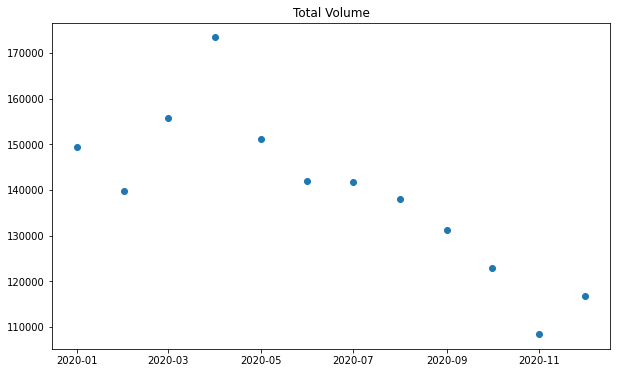

In [31]:
plt.figure(figsize=(10,6))
plt.title("Total Volume")
plt.scatter('time', 'Total_Sticks', data=monthly_sales)

<Figure size 432x432 with 0 Axes>

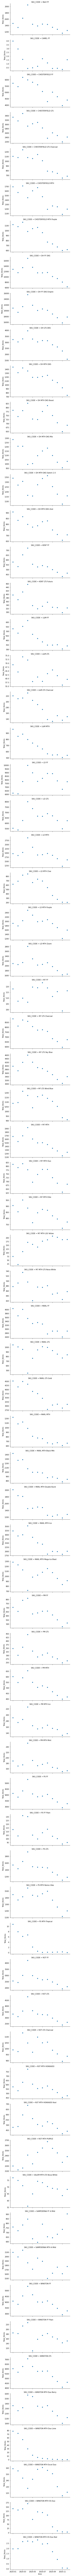

In [53]:
# Sales By SKUs over the year
sku_monthly_sales = ka_04_2020_agg_df[ka_04_2020_agg_df['data_points']==12
                                 ].groupby(['SKU_CODE', 'time'])['Total_Sticks'].sum().reset_index()


plt.figure(figsize=(6,6))
g = sns.FacetGrid(sku_monthly_sales, row="SKU_CODE", sharey=False, height=3, aspect=2)
g.map(sns.scatterplot, "time", "Total_Sticks")



plt.show()

# Transforming data into time series problems

In [55]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

series_to_supervised(ka_04_2020_agg_df).to_csv('data_to_ml.csv')